In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
import tensorflow as tf
config=tf.ConfigProto()
config.gpu_options.allow_growth = True
session=tf.Session(config=config)

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train=train['label']
X_train=train.drop(labels=['label'],axis=1)
test=test/255.0
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
Y_train=to_categorical(Y_train, num_classes=10)
X_train, X_val, Y_train, Y_val=train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

In [6]:
Y_train.shape

(37800, 10)

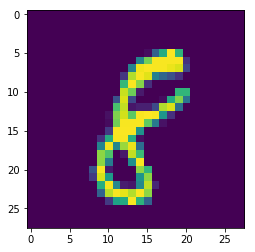

In [7]:
plt.imshow(X_train[0][:,:,0])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 10,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.1,
                                   zoom_range = 0.25,
                                   horizontal_flip = False)

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [20]:
keras.backend.clear_session()

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), padding = 'same', input_shape = (28,28,1)))
model.add(layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(64, (3,3), padding = 'same'))
model.add(layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"))
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding = 'same'))
model.add(layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(128, (3,3), padding = 'same'))
model.add(layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"))
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, (3,3), padding = 'same'))
model.add(layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Conv2D(256, (3,3), padding = 'same'))
model.add(layers.BatchNormalization(momentum=0.5, epsilon=1e-5, gamma_initializer="uniform"))
model.add(layers.LeakyReLU(alpha=0.1))

model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation = 'softmax'))








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)       

In [12]:
initial_learningrate=2e-3
batch_size = 2048
epochs = 100
input_shape = (28, 28, 1)

In [13]:
def lr_decay(epoch):#lrv
    return initial_learningrate * 0.99 ** epoch

In [14]:
import tensorflow as tf
config=tf.ConfigProto()
config.gpu_options.allow_growth = True
session=tf.Session(config=config)

model.compile(optimizer = RMSprop(lr=initial_learningrate) , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit_generator(train_datagen.flow(X_train,Y_train,batch_size=batch_size),
                              steps_per_epoch=100,
                              epochs=epochs,
                              callbacks=[LearningRateScheduler(lr_decay)],
                              validation_data=test_datagen.flow(X_val,Y_val),
                              validation_steps=50)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
100/100 [==============================] - 37s 369ms/step - loss: 0.8029 - acc: 0.7350 - val_loss: 0.0490 - val_acc: 0.9869
Epoch 2/100
100/100 [==============================] - 31s 310ms/step - loss: 0.1380 - acc: 0.9571 - val_loss: 0.0501 - val_acc: 0.9838
Epoch 3/100
100/100 [==============================] - 31s 311ms/step - loss: 0.0892 - acc: 0.9724 - val_loss: 0.0618 - val_acc: 0.9835
Epoch 4/100
100/100 [==============================] - 32s 316ms/step - loss: 0.0714 - acc: 0.9778 - val_loss: 0.0474 - val_acc: 0.9894
Epoch 5/100
100/100 [==============================] - 31s 313ms/step - loss: 0.0612 - acc: 0.9811 - val_loss: 0.0140 - val_acc: 0.9944
Epoch 6/100
100/100 [==============================] - 31s 314ms/step - loss: 0.0545 - acc: 0.9833 - val_loss: 0.0230 - val_acc: 0.9911
Epoch 7/100
100/100 [==============================] - 32s 315ms/step - loss: 0.0495 - ac

Epoch 57/100
100/100 [==============================] - 31s 308ms/step - loss: 0.0155 - acc: 0.9951 - val_loss: 0.0187 - val_acc: 0.9944
Epoch 58/100
100/100 [==============================] - 31s 309ms/step - loss: 0.0162 - acc: 0.9950 - val_loss: 0.0297 - val_acc: 0.9931
Epoch 59/100
100/100 [==============================] - 31s 308ms/step - loss: 0.0163 - acc: 0.9950 - val_loss: 0.0160 - val_acc: 0.9962
Epoch 60/100
100/100 [==============================] - 31s 309ms/step - loss: 0.0164 - acc: 0.9946 - val_loss: 0.0187 - val_acc: 0.9950
Epoch 61/100
100/100 [==============================] - 31s 310ms/step - loss: 0.0152 - acc: 0.9952 - val_loss: 0.0251 - val_acc: 0.9949
Epoch 62/100
100/100 [==============================] - 31s 309ms/step - loss: 0.0159 - acc: 0.9950 - val_loss: 0.0194 - val_acc: 0.9931
Epoch 63/100
100/100 [==============================] - 31s 308ms/step - loss: 0.0152 - acc: 0.9950 - val_loss: 0.0134 - val_acc: 0.9956
Epoch 64/100
100/100 [===================

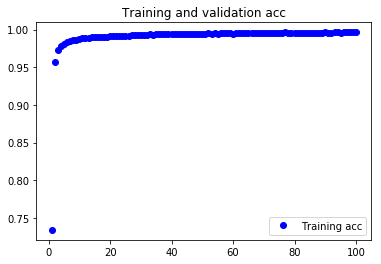

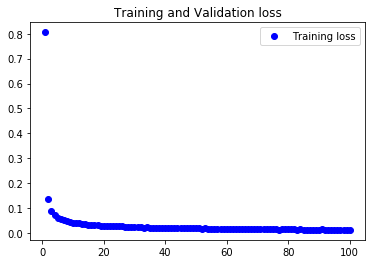

In [15]:
acc=history.history['acc']
#val_acc=history.history['val_acc']
loss=history.history['loss']
#val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
#plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
#plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [16]:
results=model.predict(test)

In [17]:
results=np.argmax(results,axis=1)

In [18]:
results=pd.Series(results,name='Label')

In [19]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen_2048_drop5_epo100.csv",index=False)

In [17]:
submission.shape

(28000, 2)